In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [2]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [3]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [4]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     180 non-null    object        
 1   month      180 non-null    int32         
 2   year       180 non-null    int32         
 3   tb         180 non-null    int64         
 4   longitude  180 non-null    float64       
 5   latitude   180 non-null    float64       
 6   time       180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 8.6+ KB


Merapihkan Data TB 2020-2023

In [5]:
import calendar

In [6]:
# Filter for years 2020-2022
df_tb = df_excel[(df_excel['year'] >= 2020) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT, month, and time
tb_total = df_tb.groupby(['KABKOT', 'month', 'time'])['tb'].sum()
tb_total

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    715
                      2021-01-01    329
                      2022-01-01    851
               2      2020-02-01    803
                      2021-02-01    326
                                   ... 
JAKARTA UTARA  11     2021-11-01    475
                      2022-11-01    685
               12     2020-12-01    201
                      2021-12-01    450
                      2022-12-01    671
Name: tb, Length: 180, dtype: int64

Merapihkan Data Curah Hujan (tp) 2020-2023

In [7]:
df_tp = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/curah_hujan/dissolved_result_tp_3years.csv')
df_tp = df_tp.drop(['Unnamed: 0'], axis=1)
print(df_tp.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'tp', 'time'], dtype='object')


In [8]:
# Filter for years 2020-2022
df_tp = df_tp[(df_tp['year'] >= 2020) & (df_tp['year'] <= 2022)]

# Group tp_mean by KABKOT, month, and time
tp_mean = df_tp.groupby(['KABKOT', 'month', 'time'])['tp'].mean()
tp_mean

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    14.475730
                      2021-01-01    10.499982
                      2022-01-01     6.211204
               2      2020-02-01    13.691263
                      2021-02-01    14.319914
                                      ...    
JAKARTA UTARA  11     2021-11-01     8.136556
                      2022-11-01     5.543476
               12     2020-12-01     9.142884
                      2021-12-01     8.356443
                      2022-12-01     7.970700
Name: tp, Length: 180, dtype: float64

Merge Files

In [9]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_tp = pd.merge(tb_total, tp_mean, on=['KABKOT', 'month'])
df_tb_tp

tb         tp
KABKOT        month                
JAKARTA BARAT 1      715  14.475730
              1      715  10.499982
              1      715   6.211204
              1      329  14.475730
              1      329  10.499982
...                  ...        ...
JAKARTA UTARA 12     450   8.356443
              12     450   7.970700
              12     671   9.142884
              12     671   8.356443
              12     671   7.970700

[540 rows x 2 columns]

In [10]:
df_tb_tp = df_tb_tp.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'tp':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [11]:
df_tb_tp

,KABKOT,month,tb,tp
0,JAKARTA BARAT,1,5685,10.395638
1,JAKARTA BARAT,2,4758,11.534759
2,JAKARTA BARAT,3,5376,7.887169
3,JAKARTA BARAT,4,4578,6.262651
4,JAKARTA BARAT,5,4125,4.730499
5,JAKARTA BARAT,6,4920,3.903356
6,JAKARTA BARAT,7,4272,2.862057
7,JAKARTA BARAT,8,4539,3.170703
8,JAKARTA BARAT,9,5070,4.081026
9,JAKARTA BARAT,10,5145,6.336498


In [12]:
df_tb_tp.shape

(60, 4)

Datetime edit for 'month'

In [13]:
import calendar

# Format for monthly graph
df_tb_tp['month'] = pd.to_datetime(df_tb_tp['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_tp = df_tb_tp.set_index('month').reset_index()

In [14]:
df_tb_tp

,month,KABKOT,tb,tp
0,January,JAKARTA BARAT,5685,10.395638
1,February,JAKARTA BARAT,4758,11.534759
2,March,JAKARTA BARAT,5376,7.887169
3,April,JAKARTA BARAT,4578,6.262651
4,May,JAKARTA BARAT,4125,4.730499
5,June,JAKARTA BARAT,4920,3.903356
6,July,JAKARTA BARAT,4272,2.862057
7,August,JAKARTA BARAT,4539,3.170703
8,September,JAKARTA BARAT,5070,4.081026
9,October,JAKARTA BARAT,5145,6.336498


Overlay layer plot for TB and TP

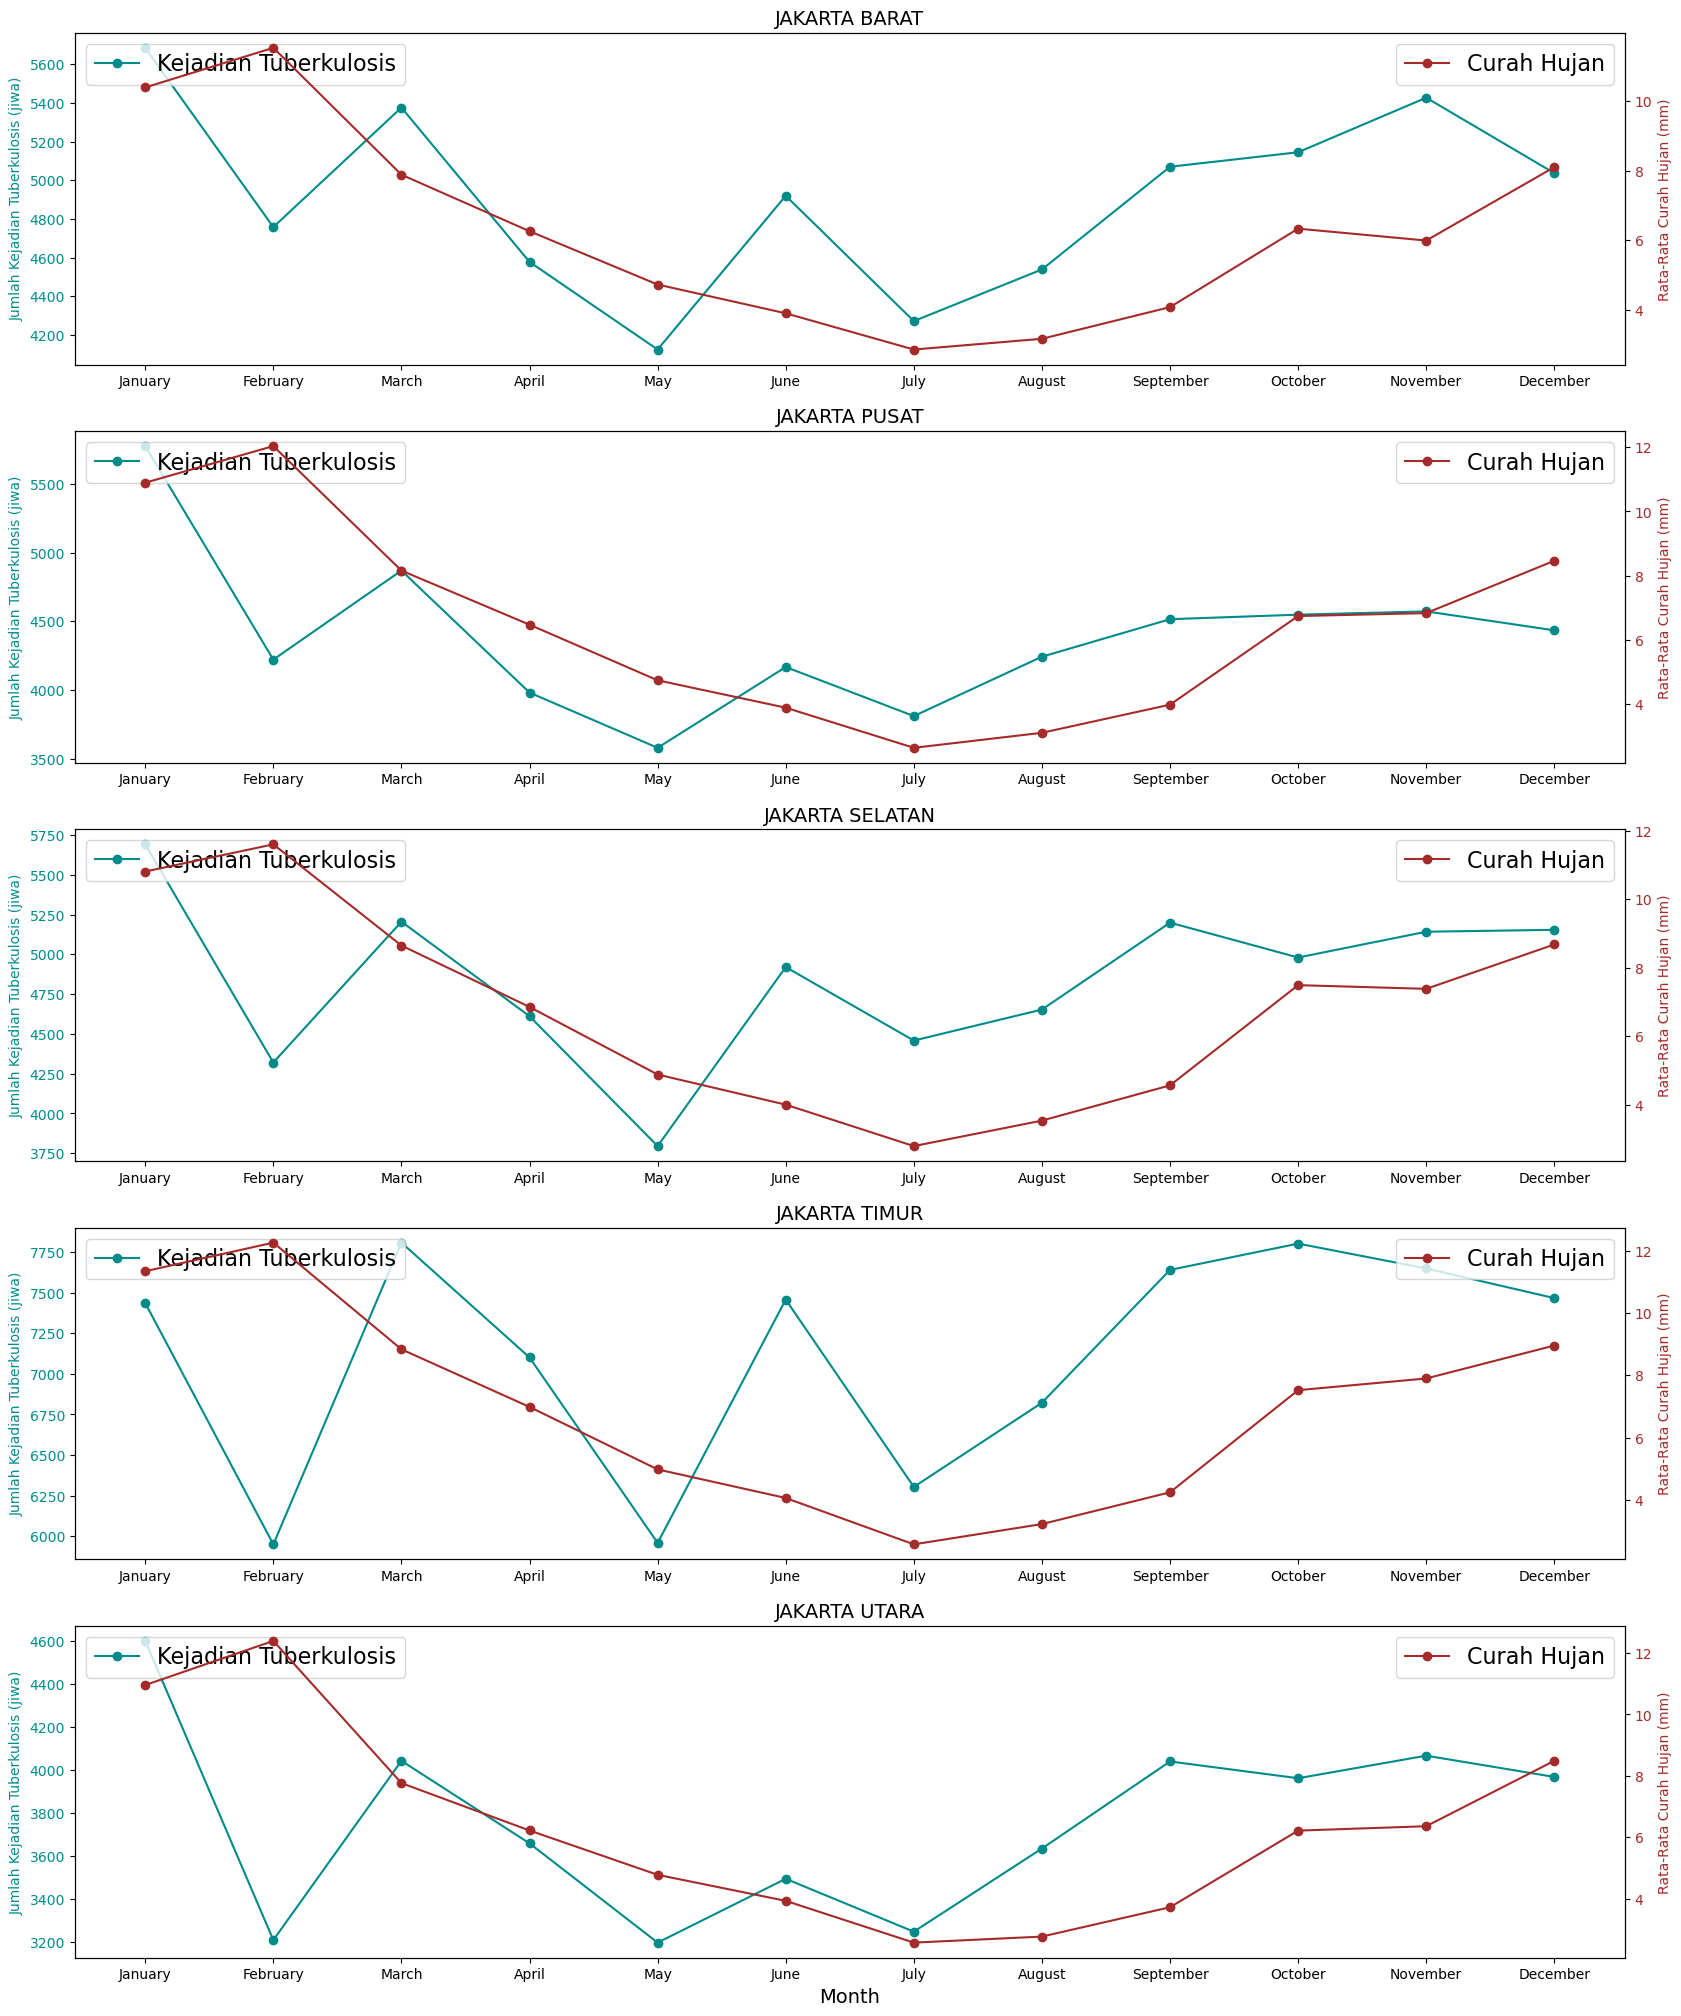

In [18]:
indicators = ['tb', 'tp']

# Group data by KABKOT
grouped_data = df_tb_tp.groupby('KABKOT')

# Plot time series for 'tb' and 'so2' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['tp']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Curah Hujan', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Curah Hujan (mm)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()